In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar archivo CSV
df = pd.read_csv("C:\\Users\\regip\\OneDrive - ITESO\\SEMESTRE 6\\Minería de Datos\\Proyecto\\Avance 02\\resultados\\AbandonoEscolar.csv")



1. Evolución nacional del abandono escolar por nivel educativo

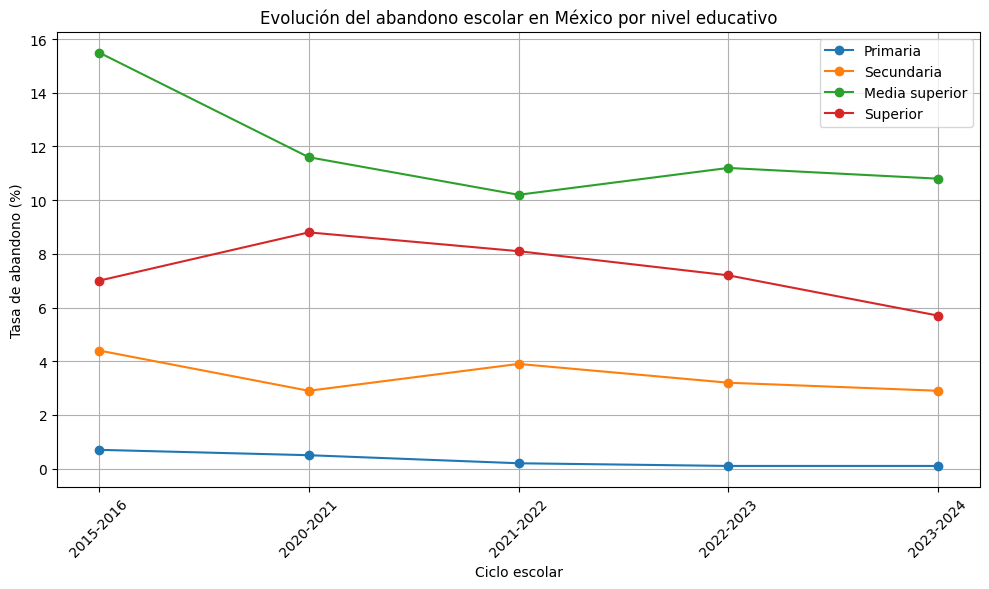

In [3]:
# Filtrar solo datos nacionales
df_nacional = df[df["entidad_federativa"] == "Estados Unidos Mexicanos"]

# Transponer los datos para graficar evolución por nivel educativo
df_nacional_melted = df_nacional.set_index("nivel_educativo").T
df_nacional_melted = df_nacional_melted.drop(index="entidad_federativa")  # eliminar columna no numérica
df_nacional_melted.index.name = "Ciclo Escolar"
df_nacional_melted = df_nacional_melted.astype(float)

# Graficar
plt.figure(figsize=(10, 6))
for nivel in df_nacional_melted.columns:
    plt.plot(df_nacional_melted.index, df_nacional_melted[nivel], marker='o', label=nivel)

plt.title("Evolución del abandono escolar en México por nivel educativo")
plt.xlabel("Ciclo escolar")
plt.ylabel("Tasa de abandono (%)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

2. Abandono escolar por estado (media superior)


<Figure size 1200x600 with 0 Axes>

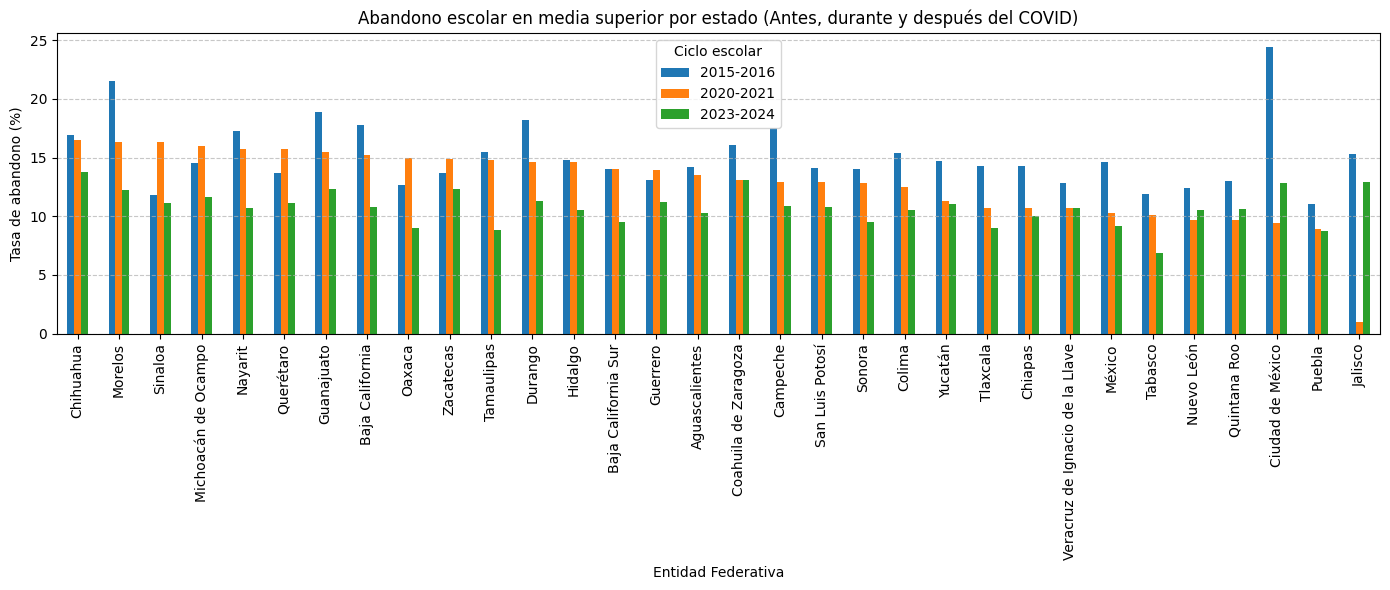

In [4]:
#Filtrar estados y nivel educativo

df_estatal = df[df["entidad_federativa"] != "Estados Unidos Mexicanos"]
df_media = df_estatal[df_estatal["nivel_educativo"] == "Media superior"]

# Seleccionar los años clave
periodos = ["2015-2016", "2020-2021", "2023-2024"]
df_media = df_media.set_index("entidad_federativa")[periodos]

# Ordenar por abandono en pandemia
df_media = df_media.sort_values(by="2020-2021", ascending=False)

# Graficar
plt.figure(figsize=(12, 6))
df_media.plot(kind='bar', figsize=(14, 6))
plt.title("Abandono escolar en media superior por estado (Antes, durante y después del COVID)")
plt.ylabel("Tasa de abandono (%)")
plt.xlabel("Entidad Federativa")
plt.xticks(rotation=90)
plt.legend(title="Ciclo escolar")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


3. Por nivel educativo durante pandemia 

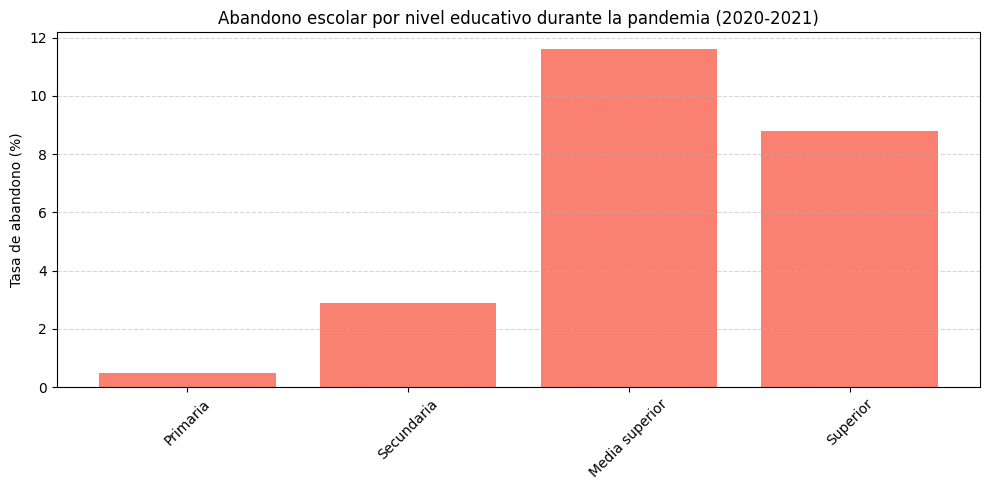

In [5]:
df_nacional = df[df["entidad_federativa"] == "Estados Unidos Mexicanos"]
niveles = df_nacional["nivel_educativo"]
abandono_2020 = df_nacional["2020-2021"].astype(float)

# Gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(niveles, abandono_2020, color='salmon')
plt.title("Abandono escolar por nivel educativo durante la pandemia (2020-2021)")
plt.ylabel("Tasa de abandono (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

4. Abandono durante pandemia

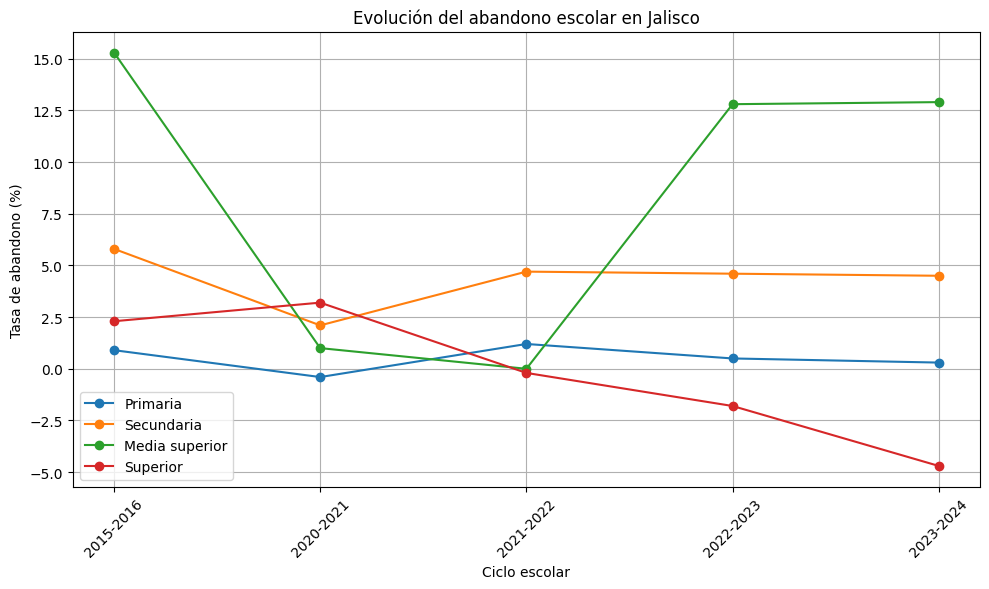

In [7]:
estado = "Jalisco"

df_estado = df[(df["entidad_federativa"] == estado)]
df_estado = df_estado.set_index("nivel_educativo").drop(columns=["entidad_federativa"]).T.astype(float)

plt.figure(figsize=(10, 6))
for nivel in df_estado.columns:
    plt.plot(df_estado.index, df_estado[nivel], marker="o", label=nivel)

plt.title(f"Evolución del abandono escolar en {estado}")
plt.xlabel("Ciclo escolar")
plt.ylabel("Tasa de abandono (%)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


5. Comparación de abandono entre norte, centro y sur

C:\Users\regip\AppData\Local\Temp\ipykernel_13476\1045438246.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estatal["región"] = df_estatal["entidad_federativa"].apply(


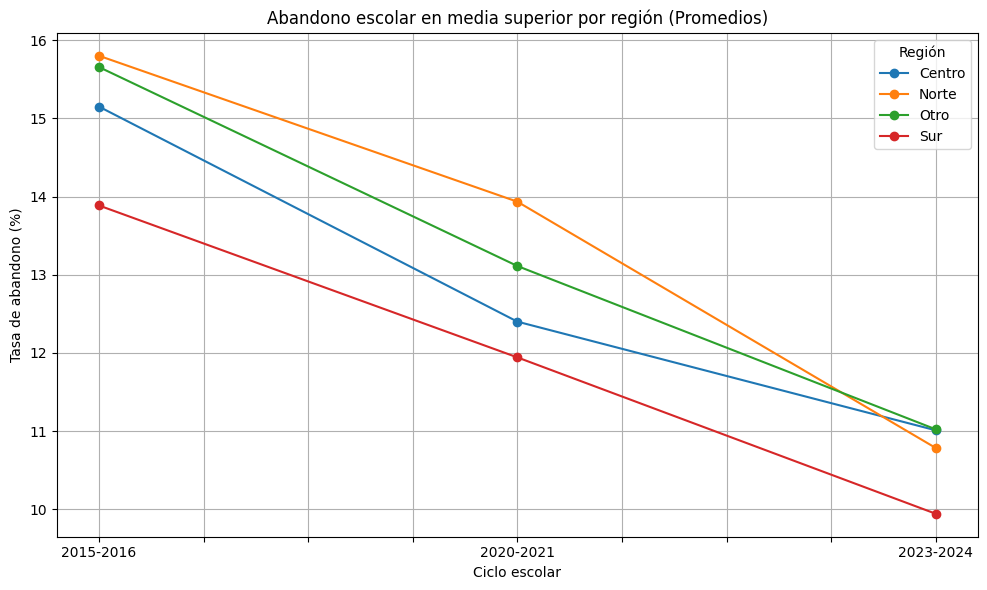

In [9]:
regiones = {
    "Norte": ["Baja California", "Sonora", "Chihuahua", "Coahuila", "Nuevo León", "Tamaulipas", "Durango"],
    "Centro": ["Jalisco", "Aguascalientes", "Querétaro", "Guanajuato", "San Luis Potosí", "Zacatecas", "Hidalgo", "CDMX", "Estado de México", "Tlaxcala", "Morelos", "Puebla"],
    "Sur": ["Michoacán", "Guerrero", "Oaxaca", "Chiapas", "Veracruz", "Tabasco", "Campeche", "Yucatán", "Quintana Roo"]
}

df_estatal = df[df["entidad_federativa"] != "Estados Unidos Mexicanos"]

df_estatal["región"] = df_estatal["entidad_federativa"].apply(
    lambda x: next((r for r, estados in regiones.items() if x in estados), "Otro")
)

# Agrupamos por región y ciclo
df_grouped = df_estatal[df_estatal["nivel_educativo"] == "Media superior"].groupby("región")[["2015-2016", "2020-2021", "2023-2024"]].mean()


df_grouped.T.plot(kind="line", marker="o", figsize=(10, 6))
plt.title("Abandono escolar en media superior por región (Promedios)")
plt.ylabel("Tasa de abandono (%)")
plt.xlabel("Ciclo escolar")
plt.grid(True)
plt.legend(title="Región")
plt.tight_layout()
plt.show()


6. Mapa de calor de evolución por estado y año (todas las entidades)

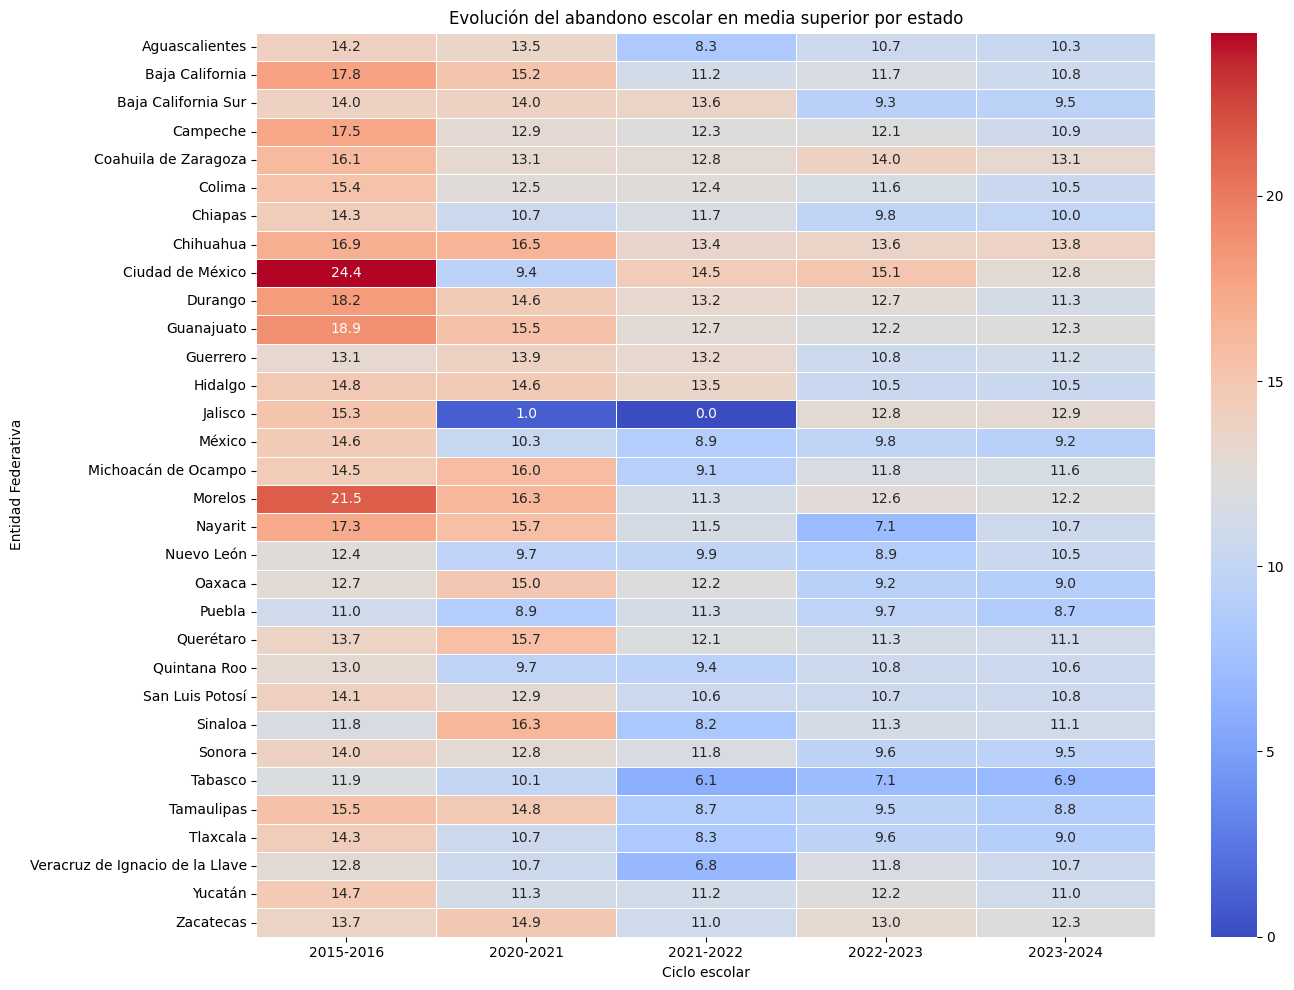

In [11]:
import seaborn as sns

df_estatal = df[df["entidad_federativa"] != "Estados Unidos Mexicanos"]
df_media = df_estatal[df_estatal["nivel_educativo"] == "Media superior"]

# Filtrar solo columnas con años
df_heatmap = df_media.set_index("entidad_federativa").filter(regex="20[0-9]{2}-20[0-9]{2}")
df_heatmap = df_heatmap.astype(float)

# Gráfico
plt.figure(figsize=(14, 10))
sns.heatmap(df_heatmap, cmap="coolwarm", annot=True, fmt=".1f", linewidths=.5)
plt.title("Evolución del abandono escolar en media superior por estado")
plt.xlabel("Ciclo escolar")
plt.ylabel("Entidad Federativa")
plt.tight_layout()
plt.show()


7. 

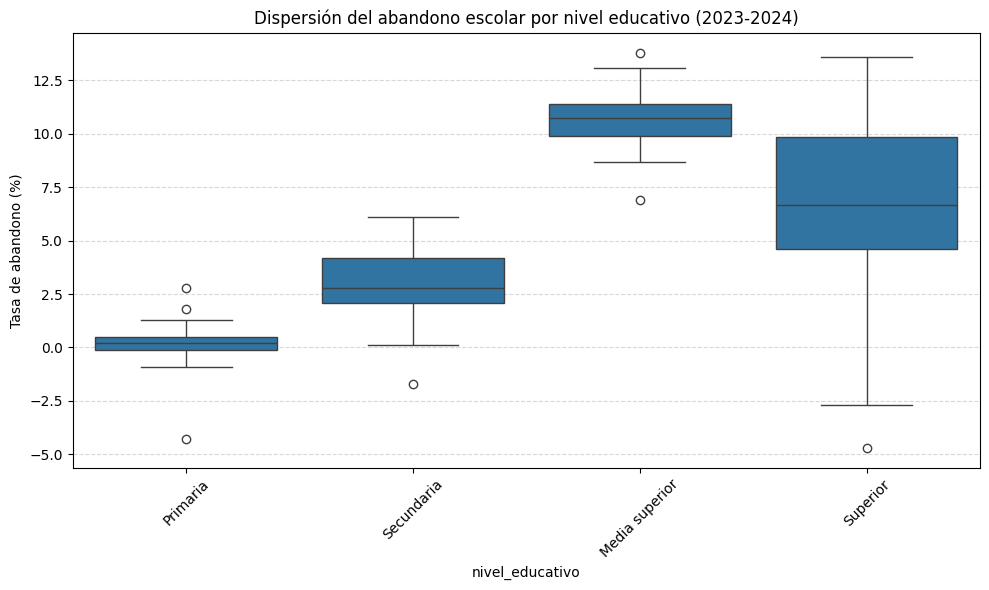

In [12]:

df_estatal = df[df["entidad_federativa"] != "Estados Unidos Mexicanos"]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_estatal, x="nivel_educativo", y="2023-2024")
plt.title("Dispersión del abandono escolar por nivel educativo (2023-2024)")
plt.ylabel("Tasa de abandono (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
